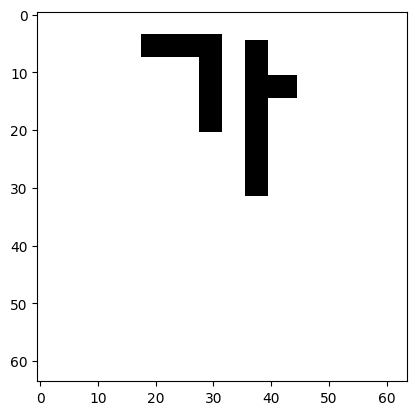

In [2]:
import numpy
import matplotlib.pyplot
%matplotlib inline

# font_data.csv 파일을 읽어 데이터 로드
csv_file = "../Data/font_data.csv"  # CSV 파일 경로
with open(csv_file, "r") as f:
    data_list = f.readlines()
    
all_values=data_list[0].split(',')
image_array=numpy.asfarray(all_values[1:]).reshape((64,64))
matplotlib.pyplot.imshow(image_array,cmap='gray',interpolation='None')

In [4]:
# 3계층의 신경망으로 MNIST 데이터를 학습하는 코드
import numpy
import scipy.special
import matplotlib.pyplot
%matplotlib inline

# 신경망 클래스의 정의
class neuralNetwork:
    # 신경망 초기화하기
    def __init__(self,inputNodes,hiddenNodes,outputNodes,learningRate):
        # 입력, 은닉, 출력 계층의 노드 개수 설정
        self.inodes = inputNodes
        self.hnodes = hiddenNodes
        self.onodes = outputNodes
        
        # 학습률
        self.lr = learningRate
        
        # 가중치 행렬 wih와 who
        # 배열 내 가중치는 w_i_j로 표기. 노드 i에서 다음 계층의 노드 j로 연결됨을 의미
        # w11 w21
        # w21 w22 등
        self.wih=numpy.random.normal(0.0,pow(self.hnodes,-0.5),(self.hnodes,self.inodes))
        self.who=numpy.random.normal(0.0,pow(self.onodes,-0.5),(self.onodes,self.hnodes))
        
        # 활성화 함수로는 시그모이드 함수를 이용
        self.activation_function = lambda x: scipy.special.expit(x)
        pass
    
    # 신경망 학습시키기
    def train(self, input_list, target_list):
        #입력 리스트를 2차원의 행렬로 변환
        input=numpy.array(input_list,ndmin=2).T
        target=numpy.array(target_list,ndmin=2).T
        
        #은닉 계층으로 들어오는 신호를 계산
        hidden_inputs=numpy.dot(self.wih, input)
        #은닉 계층에서 나가는 신호를 계산
        hidden_outputs=self.activation_function(hidden_inputs)
        
        #최종 출력 계층으로 들어오는 신호를 계산
        final_inputs=numpy.dot(self.who,hidden_outputs)
        
        #최종 출력 계층에서 나가는 신호를 계산
        final_outputs=self.activation_function(final_inputs)
        
        # 오차는 (실제 값 - 계산 값)
        output_errors=target-final_outputs

        # 은닉 계층의 오차는 가중치에 의해 나뉜 출력 계층의 오차들을 재조합해 계산
        hidden_errors=numpy.dot(self.who.T, output_errors)
        
        # 은닉 계층과 출력 계층 간의 가중치 업데이트
        self.who += self.lr*numpy.dot((output_errors*final_outputs*(1.0-final_outputs)),numpy.transpose(hidden_outputs))
        
        # 입력 계층과 은닉 계층 간의 가중치 업데이트
        self.wih += self.lr*numpy.dot((hidden_errors*hidden_outputs*(1.0-hidden_outputs)),numpy.transpose(input))
        
        pass

    # 신경망에 질의하기
    def query(self,input_list):
        # 입력 리스트를 2차원 행렬로 변환
        inputs = numpy.array(input_list, ndmin=2).T
        
        # 은닉 계층으로 들어오는 신호를 계산
        hidden_inputs=numpy.dot(self.wih,inputs)
        # 은닉 계층에서 나가는 신호를 계싼
        hidden_outputs=self.activation_function(hidden_inputs)
        # 최종 출력 계층으로 들어오는 신호를 계산
        final_inputs=numpy.dot(self.who,hidden_outputs)
        # 최종 출력 계층에서 나가는 신호를 계산
        final_outputs=self.activation_function(final_inputs)
        
        return final_outputs
        


In [16]:

# 입력, 은닉, 출력 노드의 수
input_nodes = 64*64
hidden_nodes = 100
output_nodes = 154

# 학습률은 0.3으로 정의
learning_rate = 0.5
# 신경망의 인스턴스를 생성
n = neuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

# mnist 학습 데이터인 csv 파일을 리스트로 불러오기
training_data_file=open("../Data/font_data.csv","r")
training_data_list=training_data_file.readlines()
training_data_file.close()

# 신경망 학습시키기

# 학습 데이터 모음 내의 모든 레코드 탐색
for record in training_data_list:
    # 레코드를 쉼표에 의해 분리
    all_values = record.split(',')
    # 입력 값의 범위와 값 조정
    inputs = numpy.asfarray(all_values[1:])
    # 결과값 생성 (실제 값인 0.99 이외에는 모두 0.01)
    targets=numpy.zeros(output_nodes)+0.01
    # all_values[0]은 이 레코드에 대한 결과값
    targets[int(all_values[0])]=0.99
    n.train(inputs,targets)
    pass

4097


array([[0.01367768],
       [0.013534  ],
       [0.01417962],
       [0.01565807],
       [0.01509296],
       [0.01536463],
       [0.0150987 ],
       [0.01412417],
       [0.01464376],
       [0.0138678 ],
       [0.01567953],
       [0.01473787],
       [0.01448391],
       [0.01388107],
       [0.01430994],
       [0.0150661 ],
       [0.01407861],
       [0.01552821],
       [0.01488279],
       [0.01455583],
       [0.0145791 ],
       [0.01491181],
       [0.01423769],
       [0.01500245],
       [0.01455651],
       [0.01416358],
       [0.01569321],
       [0.01412905],
       [0.01600262],
       [0.01494348],
       [0.01513527],
       [0.01387087],
       [0.01419395],
       [0.01579617],
       [0.01581173],
       [0.01427132],
       [0.01472501],
       [0.01506557],
       [0.01581195],
       [0.0154246 ],
       [0.0157493 ],
       [0.01552086],
       [0.01489829],
       [0.01665057],
       [0.01432455],
       [0.0157489 ],
       [0.01481041],
       [0.016

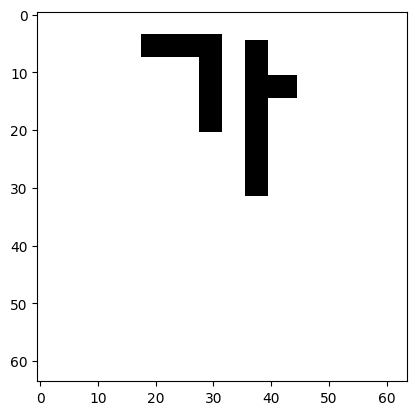

In [17]:
# mnist 테스트 데이터인 csv 파일을 리스트로 불러오기
test_data_file=open("../Data/font_data_test10.csv","r")
test_data_list=test_data_file.readlines()
test_data_file.close()

all_values=test_data_list[0].split(',')
print(len(all_values))

image_array=numpy.asfarray(all_values[1:]).reshape((64,64))
matplotlib.pyplot.imshow(image_array,cmap='gray',interpolation='None')

n.query(numpy.asfarray(all_values[1:]))